# Goal of the notebook
This notebook demonstrates 
 

1.   The correct way to download the Grassmannian packings from Neil Sloane's *AMAAAZING* [website](http://neilsloane.com/grass/grassTab.html)
2.   How to interpret them (in terms of angle of separation and visualization in 3D)

In order to be able to visualize well, let's begin with line-packings in 3D space.

The packings for 5 lines and 7 lines through a 3D sphere available [here](http://neilsloane.com/grass/dim3/grassc.3.1.5.txt) and [here](http://neilsloane.com/grass/dim3/grassc.3.1.7.txt) respectively. We purposefully picked 5 and 7 to demonstrate equi-angular (equi-isoclinic) and non equi-angular packings. (You'll learn more about this below)




In [49]:
import numpy as np
import pandas as pd
import os
import scipy as sp
from sklearn.metrics.pairwise import cosine_distances
#####################################################
cb_txt_5=np.array([-0.2567515041622561,
-0.7646629576470275,
-0.5910746368377848,
-0.7833618398916792,
0.1453251949029868,
-0.6043383286934001,
-0.1039226512550629,
0.9171517653332285,
-0.3847502071503810,
0.7481507707821368,
-0.5552399948524187,
-0.3632891029116906,
0.8426041963404403,
0.4841786667293685,
-0.2357735926554372])

cb_txt_7=np.array([-0.8660357512091325,
0.0883105669356131,
0.4921212466406468,
0.0917774516007844,
-0.1799110941824524,
-0.9793921061391798,
-0.7023471350867070,
-0.7089146224380025,
0.0644093155458075,
0.7600602784346310,
0.1194328703772649,
0.6387833456026533,
0.0550351361953868,
-0.9068946631296984,
-0.4177477753032638,
-0.7058933355778055,
0.6819619170332442,
-0.1914224190192523,
-0.0509403365791145,
-0.6991512258168202,
0.7131568169400361])
cb_txt_5.shape,cb_txt_7.shape

((15,), (21,))

Okay. Now, the question emerges as to whether this is to be unpacked in a column-wise or a row-wise fashion.
The straightforward way to do this is to compute the packing distance metric and compare it with the claimed distance in the table shared [here](http://neilsloane.com/grass/grassTab.html) .

## Wait. What's this distance metric in the first place?
Sloane answers this!
*The entries give the parent (or mother) dimension m, the dimension n of the subspaces being packed, the number N of subspaces in the packing, the **minimal squared distance D achieved**, and then a file name, reference or other comments.*


For $n=1$ this is defined to be $sin^2(\theta)$, where theta is the minimal angle between any two of the discovered lines.

So, for the codebooks downloaded above, we have:

|3 | 1 | 5	| 0.79999999 |	/usr/rhh/grass/best.3.1.5 |

|3 | 1 | 7	| 0.666666666666667 |	/usr/rhh/grass/best.3.1.7 |

## A small detour: More on Equi-isoclinic / Equi-angular packings:

*A subspace packing is said to be equi-isoclinic if all the principal angles between all pairs
of subspaces are identical[LS73].*
Related theorems in [1]:

**Corollary 7**

We have the following bound on the packing diameter of $N$ subspaces in the Grassmannian manifold $G(K,F^d)$ equipped with the spectral distance.
$pack_{spec}(\mathcal{X})^2 \le \frac{d − K}{d}\frac{N}{N-1}(4.2)$.
If the bound is met, the packing is equi-isoclinic.

**Theorem 8 (Lemmens–Seidel [LS73])**

The maximum number of equi-isoclinic $K$-dimensional
subspaces of $\mathbb{R}^d$
is no greater than:
$\frac{1}{2}d(d + 1) − \frac{1}{2}K(K + 1) + 1.$
Similarly, the maximum number of equi-isoclinic $K$-dimensional subspaces of $\mathcal{C}^d$ does not exceed $d^2 − K^2 + 1$.

So, for d=3, we can have no more than 6 packings!

References:

[1] https://arxiv.org/pdf/0709.0535.pdf

[LS73] P. W. H. Lemmens and J. J. Seidel. Equi-isoclinic subspaces of Euclidean spaces. Proc. Nederl. Akad.
Wetensch. Series A, 76:98–107, 1973.


With this background,now let's verify the 5-line and 7-line packings!


In [55]:
# Step-1: Reshape
cb_mat_5=np.reshape(cb_txt_5,(cb_txt_5.shape[0]//3,3))
print('Reshaped codebook: \n', cb_mat_5)
# Step-2: Extract the pair-wise angles
pairwise_angles=np.arccos(1-cosine_distances(cb_mat_5))
####
pairwise_angles_deg=np.rad2deg(pairwise_angles)
pairwise_angles_deg[pairwise_angles_deg>90]=180-pairwise_angles_deg[pairwise_angles_deg>90]
print('Pairwise angles in degrees: \n' , pairwise_angles_deg)
# Step-3: Estimate the squared distance
print('Sloane\'s squared distance matrix: \n',np.round(np.sin(pairwise_angles)**2,3))

Reshaped codebook: 
 [[-0.2567515  -0.76466296 -0.59107464]
 [-0.78336184  0.14532519 -0.60433833]
 [-0.10392265  0.91715177 -0.38475021]
 [ 0.74815077 -0.55523999 -0.3632891 ]
 [ 0.8426042   0.48417867 -0.23577359]]
Pairwise angles in degrees: 
 [[ 0.         63.43494882 63.43494882 63.43494882 63.43494882]
 [63.43494882  0.         63.43494882 63.43494882 63.43494882]
 [63.43494882 63.43494882  0.         63.43494882 63.43494882]
 [63.43494882 63.43494882 63.43494882  0.         63.43494882]
 [63.43494882 63.43494882 63.43494882 63.43494882  0.        ]]
Sloane's squared distance matrix: 
 [[0.  0.8 0.8 0.8 0.8]
 [0.8 0.  0.8 0.8 0.8]
 [0.8 0.8 0.  0.8 0.8]
 [0.8 0.8 0.8 0.  0.8]
 [0.8 0.8 0.8 0.8 0. ]]


In [56]:
# Step-1: Reshape
cb_mat_7=np.reshape(cb_txt_7,(cb_txt_7.shape[0]//3,3))
print('Reshaped codebook: \n', cb_mat_7)
# Step-2: Extract the pair-wise angles
pairwise_angles=np.arccos(1-cosine_distances(cb_mat_7))
####
pairwise_angles_deg=np.rad2deg(pairwise_angles)
pairwise_angles_deg[pairwise_angles_deg>90]=180-pairwise_angles_deg[pairwise_angles_deg>90]
print('Pairwise angles in degrees: \n' , pairwise_angles_deg)
# Step-3: Estimate the squared distance
print('Sloane\'s squared distance matrix: \n',np.round(np.sin(pairwise_angles)**2,3))

Reshaped codebook: 
 [[-0.86603575  0.08831057  0.49212125]
 [ 0.09177745 -0.17991109 -0.97939211]
 [-0.70234714 -0.70891462  0.06440932]
 [ 0.76006028  0.11943287  0.63878335]
 [ 0.05503514 -0.90689466 -0.41774778]
 [-0.70589334  0.68196192 -0.19142242]
 [-0.05094034 -0.69915123  0.71315682]]
Pairwise angles in degrees: 
 [[ 0.         54.73561032 54.73561032 70.52877937 70.52877937 54.73561032
  70.52877937]
 [54.73561032  0.         90.         54.73561032 54.73561032 90.
  54.73561032]
 [54.73561032 90.          0.         54.73561032 54.73561032 90.
  54.73561032]
 [70.52877937 54.73561032 54.73561032  0.         70.52877937 54.73561032
  70.52877937]
 [70.52877937 54.73561032 54.73561032 70.52877937  0.         54.73561032
  70.52877937]
 [54.73561032 90.         90.         54.73561032 54.73561032  0.
  54.73561032]
 [70.52877937 54.73561032 54.73561032 70.52877937 70.52877937 54.73561032
   0.        ]]
Sloane's squared distance matrix: 
 [[0.    0.667 0.667 0.889 0.889 0.667 0

 We note two things:

1.   The worst case distances are indeed 0.79999 for $K=5$ and 0.667 (or 54.73 degrees) for $K=7$ (So, verified!)
2.   The K=5 is equi-isoclinical and $K=7$ case pertains to non-equi-isoclinical embeddings.

Now, let's visualize this in 3D

# Helper function to visualize in 3D

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

def plt_packings(cb_mat,file_name='None'):

  fig = plt.figure(figsize=(10,10))
  ax = fig.gca(projection='3d')
  ax.set_aspect("equal")
  # If you get an error, user this: !pip install matplotlib==2.2

  # draw cube
  r = [-1, 1]
  for s, e in combinations(np.array(list(product(r, r, r))), 2):
      if np.sum(np.abs(s-e)) == r[1]-r[0]:
          ax.plot3D(*zip(s, e), color="b")

  # draw sphere
  u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
  x = np.cos(u)*np.sin(v)
  y = np.sin(u)*np.sin(v)
  z = np.cos(v)
  ax.plot_wireframe(x, y, z, color="r",alpha=0.2)

  # draw a point
  ax.scatter([0], [0], [0], color="g", s=100)

  # draw a vector
  from matplotlib.patches import FancyArrowPatch
  from mpl_toolkits.mplot3d import proj3d


  class Arrow3D(FancyArrowPatch):

      def __init__(self, xs, ys, zs, *args, **kwargs):
          FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
          self._verts3d = xs, ys, zs

      def draw(self, renderer):
          xs3d, ys3d, zs3d = self._verts3d
          xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
          self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
          FancyArrowPatch.draw(self, renderer)

  for row_ind in range(cb_mat.shape[0]):
    v=cb_mat[row_ind,:]
    a = Arrow3D([0, v[0]], [0, v[1]], [0, v[2]], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="g", linestyle="dashed")
    ax.add_artist(a)
    a = Arrow3D([0, -v[0]], [0, -v[1]], [0, -v[2]], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="g", linestyle="dashed")
    ax.add_artist(a)
  plt.title(f'{cb_mat.shape[0]} maximally apart packing lines on the 3D-sphere')
  
  if file_name!='None':
    plt.savefig(file_name, dpi=300)
    print(f'File saved as {file_name}')
  plt.show()

File saved as grass_3_1_5.pdf


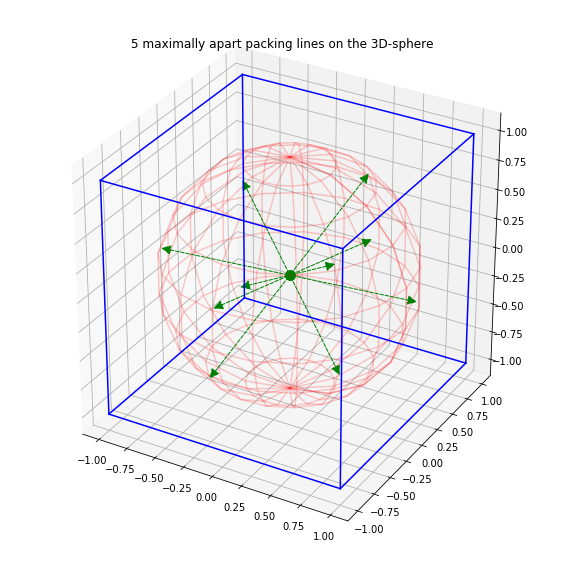

File saved as grass_3_1_7.pdf


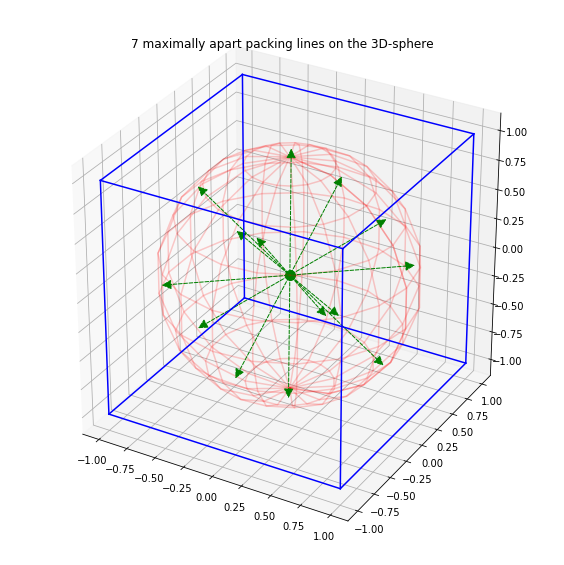

(None, None)

In [59]:
plt_packings(cb_mat_5,'grass_3_1_5.pdf'),plt_packings(cb_mat_7,'grass_3_1_7.pdf')

In [61]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
proj_dir='/gdrive/My Drive/*********'
# CHANGE THIS TO YOUR PROJECT DIRECTORY
os.chdir(proj_dir)
os.listdir(os.getcwd())

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


['Grassmannian_tutorial.ipynb',
 'CliffsNotes.gdoc',
 'grassc.16.1.50.txt',
 'Copy of Grassmannian_tutorial.ipynb']

In [63]:
# The largest line packings we have in the dataset is: 16-1-50
# Let's try that:
# Target: 16 1 50	0.944546338358845	/usr/rhh/grass/best.16.1.50

cb_txt=np.loadtxt('grassc.16.1.50.txt')
cb_txt.shape

(800,)

In [65]:
# Step-1: Reshape
cb_mat=np.reshape(cb_txt,(cb_txt.shape[0]//16,16))
print('Reshaped codebook: \n', np.round(cb_mat,3))
# Step-2: Extract the pair-wise angles
pairwise_angles=np.arccos(1-cosine_distances(cb_mat))
####
pairwise_angles_deg=np.rad2deg(pairwise_angles)
pairwise_angles_deg[pairwise_angles_deg>90]=180-pairwise_angles_deg[pairwise_angles_deg>90]
print('Pairwise angles in degrees: \n' , pairwise_angles_deg)
# Step-3: Estimate the squared distance
print('Sloane\'s squared distance matrix: \n',np.round(np.sin(pairwise_angles)**2,3))

Reshaped codebook: 
 [[ 0.242 -0.05   0.219 -0.167 -0.41   0.307 -0.192 -0.426  0.172 -0.433
   0.126 -0.213 -0.109  0.133  0.264 -0.076]
 [-0.155  0.214  0.301 -0.226 -0.076 -0.267  0.216  0.415  0.503  0.296
  -0.263 -0.134  0.134  0.202  0.023 -0.074]
 [-0.147  0.269 -0.264 -0.244 -0.241 -0.352  0.075  0.239  0.11  -0.026
   0.372  0.414  0.357  0.136  0.047  0.247]
 [-0.161 -0.39  -0.212 -0.508  0.109 -0.072  0.084  0.288 -0.023  0.033
  -0.259  0.009 -0.018  0.308 -0.005  0.498]
 [ 0.073 -0.104 -0.61  -0.073 -0.276 -0.256 -0.283  0.196 -0.067 -0.16
   0.187 -0.406 -0.074 -0.182 -0.102  0.26 ]
 [ 0.03  -0.241  0.051 -0.642  0.044 -0.311 -0.345 -0.094 -0.316 -0.288
   0.217  0.068  0.171 -0.034  0.13  -0.135]
 [ 0.368 -0.063 -0.031 -0.219  0.27   0.143  0.286  0.135  0.228  0.314
  -0.074 -0.481  0.072 -0.351 -0.019  0.321]
 [-0.181 -0.174 -0.293  0.131 -0.366 -0.001  0.134 -0.089 -0.167 -0.133
   0.253 -0.188  0.434 -0.095  0.499 -0.288]
 [ 0.075  0.055  0.178  0.035  0.177 -0.341 

In [72]:
dist_sloane_mat=np.sin(pairwise_angles)**2
dist_table=0.944546338358845
dist_eval=np.min(dist_sloane_mat[dist_sloane_mat>0])
print(f'Distance from the table:{dist_table}\nDistance computed: {dist_eval} ')

Distance from the table:0.944546338358845
Distance computed: 0.9445463383588452 


# It's the same! :D